In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Session 2 - Introduction to PYQGIS <img src="./Resources/sla.png" width="100" align ="right"/>

This session will get you started on learning how to use PyQGIS code to increase your GIS efficiency. There are several ways to use PyQGIS in QGIS Desktop including: 

* Automatically run Python code when QGIS starts
* **Issue commands in the Python console within QGIS**
* **Create and use plugins**
* **Create processing algorithms**
* Create functions for expressions in QGIS
* Create custom applications based on the QGIS API

In this course, we will focus on the three highlighted ways of using Python. You will be able to run complex workflows with the click of a button instead of clicking through multiple tools to recreate results. The skills learned in this course (Session 5) will also help you develop custom plugins for QGIS.

This course is just an introduction to PYQGIS. For all details, see [PyQGIS Developer Cookbook](https://docs.qgis.org/3.16/en/docs/pyqgis_developer_cookbook/index.html) and [QGIS Python API](https://qgis.org/pyqgis/master/) for the ultimate references.


# Standalone PYQGIS

## Import relevant modules

In [2]:
import sys
import os

import qgis
from qgis.gui import *
from qgis.core import *
from qgis.utils import plugins
from PyQt5.QtCore import *
from qgis.analysis import QgsNativeAlgorithms

# sys.path.append(r'C:\OSGeo4W64\apps\qgis\python') #this is important for loading processing library
# sys.path.append(r'C:\OSGeo4W64\apps\qgis\python\plugins') #this is important for loading processing library

In [3]:
QgsApplication.setPrefixPath(r'C:\OSGeo4W64\apps\qgis', True)
qgs = QgsApplication([], False)
qgs.initQgis()


C:\Users\user\.conda\envs\qgis-vanguard\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
print(sys.path)

['C:\\Users\\user\\Desktop\\Projects\\qgis-vanguard', 'C:\\Users\\user\\.conda\\envs\\qgis-vanguard\\Library\\python\\plugins', 'C:\\Users\\user\\.conda\\envs\\qgis-vanguard\\Library\\python', 'C:\\OSGeo4W64\\apps\\qgis\\python', 'C:\\Users\\user\\.conda\\envs\\qgis-vanguard\\python39.zip', 'C:\\Users\\user\\.conda\\envs\\qgis-vanguard\\DLLs', 'C:\\Users\\user\\.conda\\envs\\qgis-vanguard\\lib', 'C:\\Users\\user\\.conda\\envs\\qgis-vanguard', '', 'C:\\Users\\user\\.conda\\envs\\qgis-vanguard\\lib\\site-packages', 'C:\\Users\\user\\.conda\\envs\\qgis-vanguard\\lib\\site-packages\\win32', 'C:\\Users\\user\\.conda\\envs\\qgis-vanguard\\lib\\site-packages\\win32\\lib', 'C:\\Users\\user\\.conda\\envs\\qgis-vanguard\\lib\\site-packages\\Pythonwin', 'C:\\Users\\user\\.conda\\envs\\qgis-vanguard\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\user\\.ipython']


In [5]:
os.getcwd()

'C:\\Users\\user\\Desktop\\Projects\\qgis-vanguard'

## PyQT MessageBox example

In [6]:
from PyQt5.QtGui import *
from PyQt5.QtWidgets import *

In [7]:
mb = QMessageBox()
mb.setText('Click OK to confirm')
mb.setStandardButtons(QMessageBox.Ok | QMessageBox.Cancel)
return_value = mb.exec()
if return_value == QMessageBox.Ok:
    print('You pressed OK')
elif return_value == QMessageBox.Cancel:
    print('You pressed Cancel')

You pressed OK


## Open a QGIS project 

In [8]:
# as QgsProject is Singleton class, we need to get the instance of it
project = QgsProject.instance()

# open the project
project_name = 'Data/QgsProject.qgs'
project.read(project_name)

# list of layer names using list comprehension
layers = project.mapLayers()
l=[layer.name() for layer in layers.values()]

# dictionary with key = layer name and value = layer object
layers_list = {}
for l in layers.values():
  layers_list[l.name()] = l

print(layers_list)

# find layers by name
# project.mapLayersByName('MP14_Subzone_SocioEconIndicators_2017')[0]

{'Default': <QgsRasterLayer: 'Default' (wms)>, 'MP14_REGION_NO_SEA_PL': <QgsVectorLayer: 'MP14_REGION_NO_SEA_PL' (ogr)>, 'MP14_Subzone_SE_2017': <QgsVectorLayer: 'MP14_Subzone_SE_2017' (ogr)>, 'MP14_Subzone_SocioEconIndicators_2017': <QgsVectorLayer: 'MP14_Subzone_SocioEconIndicators_2017' (ogr)>, 'Road_Nwork_Central': <QgsVectorLayer: 'Road_Nwork_Central' (ogr)>, 'Taxi_Ride_Origin': <QgsVectorLayer: 'Taxi_Ride_Origin' (ogr)>, 'central_schools_sf': <QgsVectorLayer: 'central_schools_sf' (ogr)>}


## Visualize the layer using a map canvas 

In [9]:
canvas = QgsMapCanvas()
canvas.show()
canvas.setCanvasColor(Qt.white)
canvas.enableAntiAliasing(True)

layer = QgsVectorLayer(r"Data\MP14_Subzone_SocioEconIndicators_2017.shp", "SocioEcon", "ogr")

if not layer.isValid():
    raise IOError("Failed to open the layer")

# add layer to the registry
QgsProject.instance().addMapLayer(layer)

# set extent to the extent of our layer
canvas.setExtent(layer.extent())

# set the map canvas layer set
canvas.setLayers([layer])
qgs.exec_()

0

In [10]:
QgsProject.instance().mapLayers().values()

dict_values([<QgsRasterLayer: 'Default' (wms)>, <QgsVectorLayer: 'MP14_REGION_NO_SEA_PL' (ogr)>, <QgsVectorLayer: 'MP14_Subzone_SE_2017' (ogr)>, <QgsVectorLayer: 'MP14_Subzone_SocioEconIndicators_2017' (ogr)>, <QgsVectorLayer: 'Road_Nwork_Central' (ogr)>, <QgsVectorLayer: 'SocioEcon' (ogr)>, <QgsVectorLayer: 'Taxi_Ride_Origin' (ogr)>, <QgsVectorLayer: 'central_schools_sf' (ogr)>])

## Accessing the Table Of Contents (TOC)  

The layer tree is a classical tree structure built of nodes. There are currently two types of nodes: group nodes (QgsLayerTreeGroup) and layer nodes (QgsLayerTreeLayer).

In [11]:
# list of layer names using list comprehension
l = [layer.name() for layer in QgsProject.instance().mapLayers().values()]

# dictionary with key = layer name and value = layer object
layers_list = {}
for l in QgsProject.instance().mapLayers().values():
  layers_list[l.name()] = l

print(layers_list)
# QgsProject.instance().mapLayers()

{'Default': <QgsRasterLayer: 'Default' (wms)>, 'MP14_REGION_NO_SEA_PL': <QgsVectorLayer: 'MP14_REGION_NO_SEA_PL' (ogr)>, 'MP14_Subzone_SE_2017': <QgsVectorLayer: 'MP14_Subzone_SE_2017' (ogr)>, 'MP14_Subzone_SocioEconIndicators_2017': <QgsVectorLayer: 'MP14_Subzone_SocioEconIndicators_2017' (ogr)>, 'Road_Nwork_Central': <QgsVectorLayer: 'Road_Nwork_Central' (ogr)>, 'SocioEcon': <QgsVectorLayer: 'SocioEcon' (ogr)>, 'Taxi_Ride_Origin': <QgsVectorLayer: 'Taxi_Ride_Origin' (ogr)>, 'central_schools_sf': <QgsVectorLayer: 'central_schools_sf' (ogr)>}


The project layer tree can be accessed easily with the method layerTreeRoot() of the QgsProject class:

In [12]:
root = QgsProject.instance().layerTreeRoot()

root is a group node and has children:

In [13]:
root.children()

A list of direct children is returned. Sub group children should be accessed from their own direct parent.
Layers can also be retrieved using their (unique) id:

In [14]:
ids = root.findLayerIds()
# access the first layer of the ids list
root.findLayer(ids[0])

You can switch between QgsVectorLayer and QgsLayerTreeLayer easily:

In [15]:
se_layer =project.mapLayersByName('MP14_Subzone_SocioEconIndicators_2017')[0]
node_layer = root.findLayer(se_layer.id())
print("Layer node:", node_layer)
print("Map layer:", node_layer.layer())

Layer node: <qgis._core.QgsLayerTreeLayer object at 0x000002A2859F8E50>
Map layer: <QgsVectorLayer: 'MP14_Subzone_SocioEconIndicators_2017' (ogr)>


Groups can be added with the addGroup() method. 

In [16]:
node_group1 = root.addGroup('Simple Group')
# add a sub-group to Simple Group
node_subgroup1 = node_group1.addGroup("I'm a sub group")

In [17]:
# QgsProject.instance().write()

## Create a QGIS Map Application using Map Canvas 

The Map canvas shows the map composed from overlaid map layers and allows interaction with the map and layers. The map canvas is implemented with the QgsMapCanvas class in the qgis.gui module. In the following example, class MyWnd is essentially a QMainWindow (PyQt Window object) that contains a QgsMapCanvas. 

In [18]:
class MyWnd(QMainWindow):
    def __init__(self, layer):
        QMainWindow.__init__(self)

        self.canvas = QgsMapCanvas()
        self.canvas.setCanvasColor(Qt.white)

        self.canvas.setExtent(layer.extent())
        self.canvas.setLayers([layer])

        self.setCentralWidget(self.canvas)
        
        # add menu
        menubar = self.menuBar()
        menu_file = menubar.addMenu('File')
        open_action = menu_file.addAction("Open project")
        menu_help = menubar.addMenu('Help')
        open_action = menu_help.addAction("About")
        
        #there is always one tool active and the user can switch between the available tools.
        self.actionZoomIn = QAction("Zoom in", self)
        self.actionZoomOut = QAction("Zoom out", self)
        self.actionPan = QAction("Pan", self)
        
        # setcheckable means that users need to check the button and then interact with the map canvas
        self.actionZoomIn.setCheckable(True)
        self.actionZoomOut.setCheckable(True)
        self.actionPan.setCheckable(True)
        
        # triggered connect action with a function 
        self.actionZoomIn.triggered.connect(self.zoomIn)
        self.actionZoomOut.triggered.connect(self.zoomOut)
        self.actionPan.triggered.connect(self.pan)
        
        # add a toolbar to contain all the buttons
        self.toolbar = self.addToolBar("Canvas actions")
        self.toolbar.addAction(self.actionZoomIn)
        self.toolbar.addAction(self.actionZoomOut)
        self.toolbar.addAction(self.actionPan)

        # create the map tools
        self.toolPan = QgsMapToolPan(self.canvas)
        self.toolPan.setAction(self.actionPan)
        self.toolZoomIn = QgsMapToolZoom(self.canvas, False) # false = in
        self.toolZoomIn.setAction(self.actionZoomIn)
        self.toolZoomOut = QgsMapToolZoom(self.canvas, True) # true = out
        self.toolZoomOut.setAction(self.actionZoomOut)

        self.pan()
        self.initUI()

    def initUI(self):
        self.setWindowTitle('Map Canvas Example')
        
        self.my_act = QAction(QIcon('Resources/sla.png'), 'Identify', self)
        self.my_act.setCheckable(True)
        self.my_act.triggered.connect(self.identify)
        self.toolbar2 = self.addToolBar('Identify')
        self.toolbar2.addAction(self.my_act)
        
        self.toolIdentify = QgsMapToolIdentifyFeature(self.canvas)
        self.toolIdentify.setAction(self.my_act)

        self.toolIdentify.setLayer(layer)
        self.toolIdentify.featureIdentified.connect(self.onFeatureIdentified)

    def zoomIn(self):
        self.canvas.setMapTool(self.toolZoomIn)

    def zoomOut(self):
        self.canvas.setMapTool(self.toolZoomOut)

    def pan(self):
        self.canvas.setMapTool(self.toolPan)
        
    def identify(self):
        self.canvas.setMapTool(self.toolIdentify)
        
    def onFeatureIdentified(self,feature):
        self.fid = feature.id()
        print("feature selected ID is: " + str(self.fid))
        
    def getCanvas(self):
        return self.canvas
        
vlayer =QgsVectorLayer("Data/MP14_REGION_NO_SEA_PL.shp","MP14_REGION_NO_SEA_PL","ogr")
w = MyWnd(vlayer)
w.show()
qgs.exec_()

feature selected ID is: 261
feature selected ID is: 142
feature selected ID is: 59
feature selected ID is: 156
feature selected ID is: 289
feature selected ID is: 142


0

The map canvas architecture consists of three concepts:

* map canvas — for viewing of the map
* map canvas items — additional items that can be displayed on the map canvas
* map tools — for interaction with the map canvas

To show some additional data on top of the map in canvas, use map canvas items. 

## Map canvas items 

There are two useful canvas item classes for map canvas items: QgsRubberBand for drawing polylines or polygons, and QgsVertexMarker for drawing points. 

In [19]:
class MyWndDrawItem(MyWnd):
    def __init__(self,layer):
        super().__init__(layer)
    
    def initUI(self):
        super().initUI()
        self.my_tool_item_rect = QAction(QIcon('Resources/icons8-rectangle-48.png'), 'Rectangle Item', self)
        self.my_tool_item_rect.setCheckable(False)
        self.my_tool_item_rect.triggered.connect(self.rectItem)
        self.toolbar2.addAction(self.my_tool_item_rect)
        
    def rectItem(self):
        r = QgsRubberBand(self.canvas,True)  # True = a polygon
        points = [[QgsPointXY(44167,24960), QgsPointXY(46692,24960), QgsPointXY(46692,21808), QgsPointXY(44167,21808)]]
        r.setToGeometry(QgsGeometry.fromPolygonXY(points), None)
        
        # we can change the color and width of the rectangle
#         r.setColor(QColor(0, 0, 255))
#         r.setWidth(3)
        
w2 = MyWndDrawItem(vlayer)
w2.show()
qgs.exec_()

0

## Writing Custom Map Canvas Items

In [20]:
class CircleCanvasItem(QgsMapCanvasItem):
  def __init__(self, canvas):
    super().__init__(canvas)
    self.center = QgsPoint(0,0)
    self.size   = 80

  def setCenter(self, center):
    self.center = center

  def center(self):
    return self.center

  def setSize(self, size):
    self.size = size

  def size(self):
    return self.size

  def boundingRect(self):
    return QRectF(self.center.x() - self.size/2,
      self.center.y() - self.size/2,
      self.center.x() + self.size/2,
      self.center.y() + self.size/2)

  def paint(self, painter, option, widget):
    path = QPainterPath()
    path.moveTo(self.center.x(), self.center.y());
    path.arcTo(self.boundingRect(), 0.0, 360.0)
    painter.fillPath(path, QColor("red"))

In [21]:
class MyWndDrawCircle(MyWndDrawItem):
    def __init__(self,layer):
        super().__init__(layer)
    
    def initUI(self):
        super().initUI()
        self.my_tool_item_circle = QAction(QIcon('Resources/icons8-circle-48.png'), 'Circle Item', self)
        self.my_tool_item_circle.setCheckable(False)
        self.my_tool_item_circle.triggered.connect(self.circleItem)
        self.toolbar2.addAction(self.my_tool_item_circle)
    
    # wait until the next cell class CircleCanvasItem created
    def circleItem(self):
        item = CircleCanvasItem(self.canvas)
        item.setCenter(QgsPointXY(80,80))
        item.setSize(80)
        
w3 = MyWndDrawCircle(vlayer)
w3.show()
qgs.exec_()

0

## Writing Custom Map Tools

Custom map tools should inherit from the QgsMapTool or derived class. We can implement custom behaviors to actions performed by users on the canvas. Here is an example. Its allows us to define a rectangular extent by clicking and dragging on the canvas. When the rectangle is defined, it prints its boundary coordinates in the console. 

In [24]:
class PolyMapTool(QgsMapToolEmitPoint):

    def __init__(self, canvas):
        self.canvas = canvas
        QgsMapToolEmitPoint.__init__(self, self.canvas)
#         self.rubberband = QgsRubberBand(self.canvas, QgsWkbTypes.LineGeometry)
        self.rubberband = QgsRubberBand(self.canvas, QgsWkbTypes.PolygonGeometry)
        self.rubberband.setColor(Qt.red)
        self.rubberband.setWidth(1)
        self.point = None
        self.points = []

    def canvasPressEvent(self, e):
        self.point = self.toMapCoordinates(e.pos())
        m = QgsVertexMarker(self.canvas)
        m.setCenter(self.point)
        m.setColor(QColor(0,255,0))
        m.setIconSize(5)
        m.setIconType(QgsVertexMarker.ICON_BOX)
        m.setPenWidth(3)
        self.points.append(self.point)
        self.isEmittingPoint = True
        self.showPoly()
    
    def showPoly(self):
#         self.rubberband.reset(QgsWkbTypes.LineGeometry)
        self.rubberband.reset(QgsWkbTypes.PolygonGeometry)
        for point in self.points[:-1]:
            self.rubberband.addPoint(point, False)
            # if we add the two lines here, it be another interesting drawtool
#             self.rubberband.addPoint(self.points[-1], True)
#             self.rubberband.show()
        self.rubberband.addPoint(self.points[-1], True)
        self.rubberband.show()

In [25]:
class MyWndDrawPolyTool(MyWndDrawCircle):
    def __init__(self,layer):
        super().__init__(layer)
    
    def initUI(self):
        super().initUI()
        
        # First we define our polygon tool’s button in the actions portion of our application. 
        self.my_poly_tool = QAction(QIcon('Resources/icons8-polygon-64.png'), 'Poly Tool', self)
        
        # we make sure that when you click the button, it stays selected:
        self.my_poly_tool.setCheckable(True)
        
        # we define the method used when the button is triggered
        self.my_poly_tool.triggered.connect(self.poly)
        self.toolbar2.addAction(self.my_poly_tool)
        
        # Then we link the application to our specialized tool class:
        self.toolPoly = PolyMapTool(self.canvas)
        self.toolPoly.setAction(self.my_poly_tool)

    # we define the method in the main application class for our tool:
    def poly(self):
        self.canvas.setMapTool(self.toolPoly)
        
w4 = MyWndDrawPolyTool(vlayer)
w4.show()
qgs.exec_()

0

For more examples on rubberband, see https://www.programcreek.com/python/example/100665/qgis.gui.QgsRubberBand

## Geoprocessing 

In [26]:
# import processing
from osgeo import ogr

In [27]:
import geopandas as gpd
import matplotlib.pyplot as plt
plt.ion()

import processing
from processing.core.Processing import Processing
Processing.initialize()
QgsApplication.processingRegistry().addProvider(QgsNativeAlgorithms())
for alg in QgsApplication.processingRegistry().algorithms():
        print(alg.id(), "--->", alg.displayName())

3d:tessellate ---> Tessellate
gdal:aspect ---> Aspect
gdal:assignprojection ---> Assign projection
gdal:buffervectors ---> Buffer vectors
gdal:buildvirtualraster ---> Build virtual raster
gdal:buildvirtualvector ---> Build virtual vector
gdal:cliprasterbyextent ---> Clip raster by extent
gdal:cliprasterbymasklayer ---> Clip raster by mask layer
gdal:clipvectorbyextent ---> Clip vector by extent
gdal:clipvectorbypolygon ---> Clip vector by mask layer
gdal:colorrelief ---> Color relief
gdal:contour ---> Contour
gdal:contour_polygon ---> Contour Polygons
gdal:convertformat ---> Convert format
gdal:dissolve ---> Dissolve
gdal:executesql ---> Execute SQL
gdal:extractprojection ---> Extract projection
gdal:fillnodata ---> Fill nodata
gdal:gdal2tiles ---> gdal2tiles
gdal:gdal2xyz ---> gdal2xyz
gdal:gdalinfo ---> Raster information
gdal:gridaverage ---> Grid (Moving average)
gdal:griddatametrics ---> Grid (Data metrics)
gdal:gridinversedistance ---> Grid (Inverse distance to a power)
gdal:grid

C:\Users\user\.conda\envs\qgis-vanguard\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


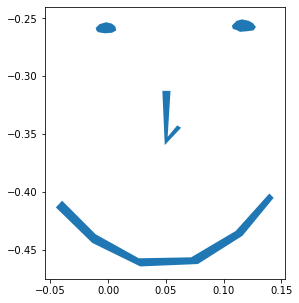

In [28]:
source = r"Data\smile.geojson"
inputvector = QgsVectorLayer(source)
fig, ax = plt.subplots(figsize = (5,5))
gpd.read_file(source).plot(ax=ax);

In [29]:
processing.algorithmHelp("native:extractvertices")

Extract vertices (native:extractvertices)

This algorithm takes a line or polygon layer and generates a point layer with points representing the vertices in the input lines or polygons. The attributes associated to each point are the same ones associated to the line or polygon that the point belongs to.

Additional fields are added to the point indicating the vertex index (beginning at 0), the vertex’s part and its index within the part (as well as its ring for polygons), distance along original geometry and bisector angle of vertex for original geometry.


----------------
Input parameters
----------------

INPUT: Input layer

	Parameter type:	QgsProcessingParameterFeatureSource

	Accepted data types:
		- str: layer ID
		- str: layer name
		- str: layer source
		- QgsProcessingFeatureSourceDefinition
		- QgsProperty
		- QgsVectorLayer

OUTPUT: Vertices

	Parameter type:	QgsProcessingParameterFeatureSink

	Accepted data types:
		- str: destination vector file, e.g. 'd:/test.shp'
		- st

C:\Users\user\.conda\envs\qgis-vanguard\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


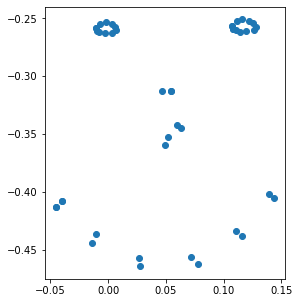

In [30]:
vertice_out = r"Data\smile_vertices.geojson"
# just delete the output if exist
if os.path.exists(vertice_out):
    os.remove(vertice_out)
else:
    pass
params = {
    'INPUT': inputvector,
    'OUTPUT': vertice_out
}
feedback = QgsProcessingFeedback()
processing.run("native:extractvertices", params, feedback=feedback)
fig, ax = plt.subplots(figsize = (5,5))
gpd.read_file(vertice_out).plot(ax=ax);

In [31]:
# Finally, exitQgis() is called to remove the
# provider and layer registries from memory
qgs.exitQgis()
qgs.exit()

C:\Users\user\.conda\envs\qgis-vanguard\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
